![Banner](img/banner.png)

# **Taller:** Regresión Lineal Estocástica

***Matemáticas para Machine Learning***.

**Semana 6 - Práctica Calificada -** Minimización de Funciones

**Profesor:** *Fernando Lozano* - **Autor Notebook:** *César Garrido Urbano*

## Introducción

## Descripción

El presente *jupyter notebook* contine todo el material para el desarrollo del Taller de la Semana 6 del curso ***Matemáticas para Machine Learning***. En este Taller usted pondrá en práctica algunos de los conceptos de minimización de funciones y descenso de gradiente. Esto con el fin de implementar, con un enfoque distinto, el ya conocido método de regresión lineal sobre el problema de regresión práctico trabajado  en el taller de la semana 5.

**Objetivos de Aprendizaje:**

*   Implementar descenso de gradiente estocástico en un problema de minimización de una función de error sobre datos. 
*   Ajustar experimentalmente el tamaño del paso en descenso de gradiente estocástico. 
*   Enumerar las ventajas de descenso de gradiente estocástico con respecto a descenso de gradiente. 


## Teoría

Recordemos el concepto de regresión lineal en multiples variables, introducido la semana pasada. Este modelo matemático busca aproximar la relación entre una variable independiente ($x$) y una dependiente ($y$) a partir de unos parámetros ($W$).

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b = W^TX + b
\end{equation}

Donde $\hat{y}$ corresponde a la estimación de la variable dependiente, a partir de los datos $x$ y los parámetros $W$.

Es común definir $x_0 = 1$ y $w_0 = b$, con esta convención la fórmula de regresión se simplifica a:

\begin{equation}
\hat{y} = W^TX
\end{equation}

En este taller usted estimará los parámetros $W$, que produzcan la mejor estimación de $y$ a partir de los datos $x$. No obstante, y a diferencia de la semana pasada, está vez lo hará utilizando una aproximación diferente: Decenso de gradiente estocástico.

## Metodología

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o no, revise y complete la asignación).

Adicionalmente, se encontrará con preguntas a las que deberá responder a partir del trabajo que realice durante el Taller. Utilice las celdas de Markdown dispuestas para esto, estas estarán marcadas de la siguiente manera:

**Respuesta:**

# Regresión Lineal Estocástica

Igual que en el taller de la Semana 5, se desea estimar los parámetros $\hat{W}$ que mejor ajusten la relación entre $x$ y $y$. Para esto, usted va a querer minimizar el la diferencia entre el dato ($y$) y la estimación del dato ($\hat{y}$). De forma más especifica usted va a querer minimizar la diferencia cuadrada, es decir:

\begin{align}
E(W) &= (Y - \hat{Y})^2 \\
&= (Y - W^T X)^2 
\end{align}

Note que esta función de error cuadrático únicamente depende de $W$, pues los $X$ y los $Y$ son los datos que se van a utlizar para ajustar la regresión. Ahora bien, en esta ocación usted va a iniciar con un valor inicial aleatorio para $\hat{W}$ e irá actualizando dicho valor, tal que se minimice este error. 

-----------------------------
__¿Cómo?__

Actualizando $\hat{W}$ en la dirección en la que minimice el error, es decir, en la diricción contraria al gradiente de $E(W)$. Así las cosas, lo que se desea es implementar el algoritmo de Descenso de Gradiente (GD):

-----------------------------
-----------------------------
Inicialice $w_0$

repeat

$w_{k+1} = w_k - \alpha \bigtriangledown E(w)$
    
until Condición de terminación.

-----------------------------

Donde,

*   $\alpha$ será el tamaño del paso (también conocido como tasa de aprendizaje).
*   $\bigtriangledown E(w)$ será el gradiente del error, el cual en el caso estocástico será estimado a partir de una pequeña muestra de los datos o incluso a partir de un único dato en el caso extremo:

\begin{equation}
\bigtriangledown E(w) \approx (W^T x_i - y_i)x_i
\end{equation}

De esta manera, usted buscará implementar este algoritmo, de manera estocástica (utilizando un muestra o _mini-batch_ de los datos) a lo largo de este taller.

## Inicialización

In [1]:
# Librerias principales
import sys
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Visualización
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## Datos

Considere la base de datos\* trabajada durante la Semana 5. Esta contiene 11 distintas caracteristicas fisicoquímicas ($X$) del vino tinto para más de 1500 presentaciones y su calidad ($y$) en la última columna. De forma similar a como lo hizo en el anterior taller, su objetivo será tratar de estimar la calidad de cada vino, pero esta vez utilizando el algoritmo de descenso de gradiente.

\* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. _Modeling wine preferences by data mining from physicochemical properties._ In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


In [2]:
# Cargar data de calidad de vinos
data = pd.read_csv("CalidadVinoTinto.csv", delimiter=";")
data.head(10)

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Implementación

Considere la clase $\texttt{RegresionLinearEstocastica}$, similar a la implementada en el Taller de la Semana 5. Complete la función de estimar parámetros con el algoritmo de Descenso de Gradiente explicado anteriormente.

In [3]:
class RegresionLinearEstocastica:
    """
    Clase que implementa un modelo de regresión lineal de forma estocástica.
    ___________________________________
    Parámetros:
    w          [numpy.ndarray] Matriz con los parámetros estimados.
    n_muestra  [int] Tamaño de muestra. Número de datos con los que se estima el gradiente.
    alpha      [float] Factor con le que se escala la actualización de los parámetros.
    epsilon    [float] Error mínimo para activar la condición de parada.
    max_iter   [int] Número máximo de iteraciones que se ejecuta el algoritmo.
    """
    def __init__(self, n_muestra=10, alpha=0.00001, max_iter=1000, epsilon=0.00001):

        # Parámetros de entrenamiento
        self.n_muestra = n_muestra
        self.alpha = alpha
        # Condicion de parada
        self.max_iter = max_iter
        self.epsilon = epsilon
        # Vector de parámetros a estimar
        self.W = None
        self.e_historial = []

    def estimar_parametros(self, X, y):
        """
        Estima la matriz W a partir de datos de entrada X (observación) y (salida)
        con el algoritmo de descenso de gradiente estocástico.
        ___________________________________
        Entrada:
        X        [numpy.ndarray] Variables de entrada indepentdientes.
        y        [numpy.ndarray] Variable de salida que se desea estimar.
        """

        # =====================================================
        # COMPLETAR ===========================================
        #

        # Agregar vector de 1s a los datos
        x0 = np.ones((len(X),1))
        X = np.append(x0, X, axis=1)

        # Inicializar Vector de parámetros de forma aleatoria
        self.W = np.random.random_sample((X.shape[1],))

        # Reiniciar historial de error
        self.e_historial = []

        # CICLO ENTRENAMIENTO
        for i in range(self.max_iter):

            # Seleccionar una muestra aleatoria
            indices = np.random.choice(len(X), size=self.n_muestra)
            X_muestra = X[indices,:]
            # Calculo de gradiente para la muestra
            gradiente = np.zeros((X.shape[1],))

            for x, i in zip(X_muestra, indices):
                g = (np.dot(x, self.W) - y[i])*x
                gradiente += g

            # Actualizar parametros
            prev_w = self.W.copy()
            self.W = prev_w - self.alpha*gradiente/self.n_muestra

            # Calculo de error
            y_pred = np.dot(X, self.W)
            error = mean_squared_error(y, y_pred)
            self.e_historial.append(error)

            # Condición de parada
            if np.linalg.norm(self.W - prev_w) < self.epsilon:
                break
            
        # =====================================================

    def graficar_historial_error(self):
        """
        Grafica la evolución del error a lo largo del entrenamiento.

        """
        # Verificar historial existe
        if self.e_historial != []:
            plt.figure(figsize=(12,7))
            plt.plot(self.e_historial)
            plt.title('Evolución del error de entrenamiento')
            plt.xlabel('Iteraciones')
            plt.ylabel('Error medio cuadrático (MSE)')
            plt.grid(True)
        else:
            raise Exception("No se han estimado los parametros todavía!")

    def estimar_datos(self, X):
        """
        Estima la variable de salida de una nueva observación (X) y los parámetros estimados apra el modelo (W).
        ___________________________________
        Entrada:
        X        [numpy.ndarray] Nueva observación - variables de entrada indepentdiente.
        ___________________________________
        Salida:
        y        [numpy.ndarray] Variable de salida estimada.
        """
        # Verificar parámetros estimados
        if self.W is not None:
            # Agregar vector de 1s
            x0 = np.ones((len(X),1))
            X = np.append(x0, X, axis=1)

            # Realizar predicción
            y_pred = np.dot(X, self.W)

            return y_pred
        
        # En caso de no haber estimado parámetros se lanza excepción
        else:
            raise Exception("No se han estimado los parametros todavía!")

In [4]:
# Matriz de datos
X = data.drop(columns=['calidad']).values
# Vector con etoquetas
y = data['calidad'].values

# Regresión lineal
lr = RegresionLinearEstocastica()
lr.estimar_parametros(X, y)

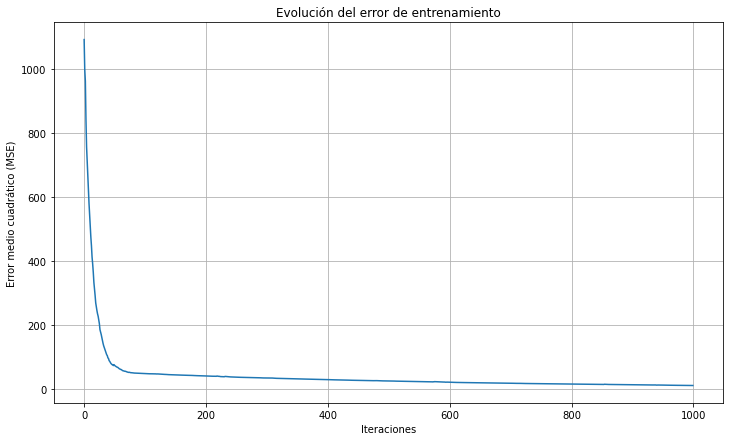

In [5]:
# Gráfica del error
lr.graficar_historial_error()

In [6]:
# Estimar datos de entrenamiento
y_pred = lr.estimar_datos(X)

# Calcular error sobre datos de entrenamiento
error = mean_squared_error(y, y_pred, squared=False)
print(error)

3.3369804570053927


In [7]:
# Agregar predicciones al DataFrame
data['regresion'] = y_pred

In [8]:
# Visualización algunos datos de la regresión en comparación con sus valores reales
data[['calidad', 'regresion']]

,calidad,regresion
0,5,6.438242
1,5,7.356800
2,5,5.498462
3,6,7.293841
4,5,6.438242
...,...,...
1594,5,11.247579
1595,6,12.581704
1596,6,10.728864
1597,5,11.336373


In [9]:
# Visualización de casos frontera
data[['calidad', 'regresion']].sort_values(by=['calidad', 'regresion'])

,calidad,regresion
1478,3,5.870383
690,3,6.892991
1505,3,6.904485
459,3,7.144597
1299,3,7.478737
...,...,...
455,8,8.113496
440,8,8.136404
1549,8,8.947664
828,8,12.404389


## Variación de parámetros

A continuación, varíe los parámetros $\alpha$ y $\texttt{n_muestras}$, tal que obtenga un mejor entrenamiento. Consideré los efectos que estos parámetros pueden tener en el entrenamiento y visualice la evolución del error. 

Puede también variar los parámetros de condición de parada a su discreción.

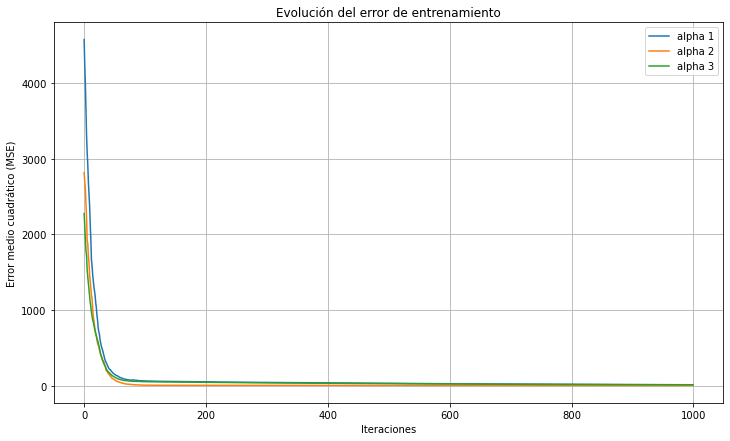

In [10]:
# Variación del tamaño del paso (alpha)

# Test regresión lineal
lr_1 = RegresionLinearEstocastica(alpha=0.00001)
lr_1.estimar_parametros(X, y)

lr_2 = RegresionLinearEstocastica(alpha=0.00001)
lr_2.estimar_parametros(X, y)

lr_3 = RegresionLinearEstocastica(alpha=0.00001)
lr_3.estimar_parametros(X, y)

# Gráfica del error
plt.figure(figsize=(12,7))
plt.plot(lr_1.e_historial)
plt.plot(lr_2.e_historial)
plt.plot(lr_3.e_historial)
plt.legend(['alpha 1', 'alpha 2', 'alpha 3'])
plt.title('Evolución del error de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Error medio cuadrático (MSE)')
plt.grid(True)
plt.show()

In [ ]:
# Variación del tamaño del número de muestras

# Test regresión lineal
lr_1 = RegresionLinearEstocastica(n_muestra=11)
lr_1.estimar_parametros(X, y)

lr_2 = RegresionLinearEstocastica(n_muestra=12)
lr_2.estimar_parametros(X, y)

lr_3 = RegresionLinearEstocastica(n_muestra=13)
lr_3.estimar_parametros(X, y)

# Gráfica del error
plt.figure(figsize=(12,7))
plt.plot(lr_1.e_historial)
plt.plot(lr_2.e_historial)
plt.plot(lr_3.e_historial)
plt.legend(['n_muestras 1', 'n_muestras 2', 'n_muestras 3'])
plt.title('Evolución del error de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Error medio cuadrático (MSE)')
plt.grid(True)
plt.show()

A partir de sus experimentos, establezca un set de parámetros que considere adecuado y evalue el error que obtiene. Contraste estos resultados con los del Taller 5.

In [ ]:
# Mejores parámetros

# Regresión lineal
lr = RegresionLinearEstocastica(n_muestra=10, alpha=0.0001)
lr.estimar_parametros(X, y)

# Gráfica del error
lr.graficar_historial_error()

In [ ]:
# Calcular error sobre datos de entrenamiento
error = mean_squared_error(y, y_pred, squared=False)
print(error)

# Análisis de Resultados

¿Qué efecto tiene el parámetro $\alpha$ en el entrenamiento? Considere los experimentos realizados y explique su respuesta.

**Respuesta:**

¿Qué efecto tiene el parámetro $\texttt{n_muestras}$ en el entrenamiento? Considere los experimentos realizados y explique su respuesta.

**Respuesta:**

¿Cómo obtuvo los mejores paramétros para este entrenamiento? Explique el proceso.

¿Cómo se comparan estos resultados con los del Taller 5?
Explique las diferencias y cuales cree que son las ventajas y desventajas de cada una de las aproximaciones a resolver el problema de regresión lineal

**Respuesta:**